

```
###MNIST text detection using CNN and PyTorch
i.e handwiritten 28*28 grascale image from 0 to 9
```



In [15]:
#importing files
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

import time

In [4]:
#converting MNIST image files into tensor of 4-Dimensions(no of images, hight, width, color channel )
transform = transforms.ToTensor()

In [5]:
#Train data
train_data = datasets.MNIST(root='/cnn_data', train = True, download = True, transform= transform)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 12835785.11it/s]


Extracting /cnn_data/MNIST/raw/train-images-idx3-ubyte.gz to /cnn_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 346132.64it/s]


Extracting /cnn_data/MNIST/raw/train-labels-idx1-ubyte.gz to /cnn_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 3222456.62it/s]


Extracting /cnn_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /cnn_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3914224.12it/s]

Extracting /cnn_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /cnn_data/MNIST/raw



In [6]:
#Test data
test_data = datasets.MNIST(root='/cnn_data', train = False, download = True, transform= transform)

In [7]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /cnn_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [8]:
test_data


Dataset MNIST
    Number of datapoints: 10000
    Root location: /cnn_data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [9]:
#Create a small batch size  for images
train_loader = DataLoader(train_data, batch_size = 10, shuffle=True)
test_loader = DataLoader(train_data, batch_size = 10, shuffle=False)

In [10]:
#Model Class
class ConvolutionalNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    #convulational layer
    self.conv1 = nn.Conv2d(1, 6, 3, 1)
    self.conv2 = nn.Conv2d(6, 16, 3, 1)
    #fully connected layer
    self.fc1 = nn.Linear(5*5*16, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = F.max_pool2d(x,2,2) #2x2 kernal and stride 2
    #second pass
    x = F.relu(self.conv2(x))
    x = F.max_pool2d(x,2,2)

    #review to flatten it out
    x =x.view(-1, 16*5*5) #negative one so that we can vary the batch size

    #fully connected layer
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return F.log_softmax(x, dim=1)

In [11]:
# creating the instance of our model
torch.manual_seed(68)
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [12]:
#Loss functiion optmizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [13]:
start_time = time.time()

#create variable to track things
epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

#for loop of epochs
for i in range(epochs):
  trn_corr = 0
  tst_corr = 0

  #train
  for b,(X_train, y_train) in enumerate(train_loader):
    b+=1
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    predicted = torch.max(y_pred.data, 1)[1] #add up the number of correct prediction. Indexed off the first point
    batch_corr = (predicted == y_train).sum() # how many we got correct from this batch
    trn_corr += batch_corr

    #update out parameters
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    #print out some results
    if b%600 == 0:
      print(f'Epoch: {i} Batch: {b} Loss: {loss.item()}')

  train_losses.append(loss)
  train_correct.append(trn_corr)

  # test
  with torch.no_grad(): #no gradient update so we dont update our weight with test
    for b,(X_test, y_test) in enumerate(test_loader):
      y_val = model(X_test)
      predicted = torch.max(y_val.data, 1)[1] # adding up correct predictions
      tst_corr +=  (predicted == y_test).sum() #T=1 F=0 and sum away

  loss = criterion(y_val, y_test)
  test_losses.append(loss)
  test_correct.append(tst_corr)



current_time = time.time()
total_time = current_time - start_time
print(f'Training Took: {total_time/60} minutes!')

Epoch: 0 Batch: 600 Loss: 0.1768302321434021
Epoch: 0 Batch: 1200 Loss: 0.18767285346984863
Epoch: 0 Batch: 1800 Loss: 0.42249560356140137
Epoch: 0 Batch: 2400 Loss: 0.5561692714691162
Epoch: 0 Batch: 3000 Loss: 0.021195080131292343
Epoch: 0 Batch: 3600 Loss: 0.185587078332901
Epoch: 0 Batch: 4200 Loss: 0.019619228318333626
Epoch: 0 Batch: 4800 Loss: 0.009477656334638596
Epoch: 0 Batch: 5400 Loss: 0.002729531144723296
Epoch: 0 Batch: 6000 Loss: 0.017329446971416473
Epoch: 1 Batch: 600 Loss: 0.018110673874616623
Epoch: 1 Batch: 1200 Loss: 0.0021817239467054605
Epoch: 1 Batch: 1800 Loss: 0.020552141591906548
Epoch: 1 Batch: 2400 Loss: 0.17485789954662323
Epoch: 1 Batch: 3000 Loss: 0.0011280154576525092
Epoch: 1 Batch: 3600 Loss: 0.012909230776131153
Epoch: 1 Batch: 4200 Loss: 0.015333756804466248
Epoch: 1 Batch: 4800 Loss: 0.024384880438447
Epoch: 1 Batch: 5400 Loss: 0.0010547182755544782
Epoch: 1 Batch: 6000 Loss: 0.0206854697316885
Epoch: 2 Batch: 600 Loss: 0.004656207747757435
Epoch: 

In [16]:
# graph the loss at epoch
train_losses = [t1.item() for t1 in train_losses]
plt.plot(train_losses, label = 'Training loss')
plt.plot(test_losses, label = 'Validation Loss')
plt.title('Loss at Epoch')
plt.legend()

AttributeError: 'float' object has no attribute 'item'

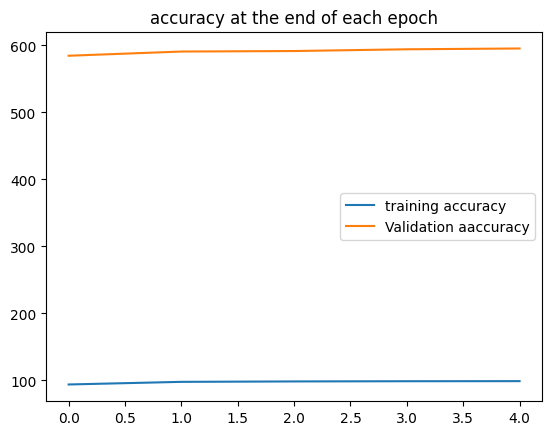

In [17]:
#graph of accuracy at the end of each epch
plt.plot([t/600 for t in train_correct], label = 'training accuracy')
plt.plot([t/100 for t in test_correct], label = 'Validation aaccuracy')
plt.title('accuracy at the end of each epoch')
plt.legend()